# Importing the Required Libraries

In [ ]:
import cv2 # for using computer vision related functions
import numpy as np # for numerical computations on 2D image array
import pandas as pd # for dataset preparation for deep learning libraries
import matplotlib.pyplot as plt # for displaying image and plotting graph

# Reading our Processed Dataset

In [ ]:
# the different classes of our shapes
categories = ["circle", "square", "star", "triangle"]

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/sem 8/CV/processed_shapes/shapes.csv")
dataset.drop("Unnamed: 0", axis = 1, inplace = True)
features = dataset.columns[:-1]
target = "target"
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,triangle
14966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,triangle
14967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,triangle
14968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,triangle


star        3765
square      3765
triangle    3720
circle      3720
Name: target, dtype: int64


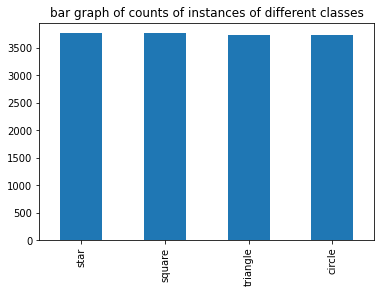

In [ ]:
print(dataset[target].value_counts())
dataset[target].value_counts().plot(kind = 'bar', title = "bar graph of counts of instances of different classes");

## Transforming classes to integer values

In [ ]:
mapping_dict = dict(zip(categories, range(len(categories))))
mapping_dict

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}

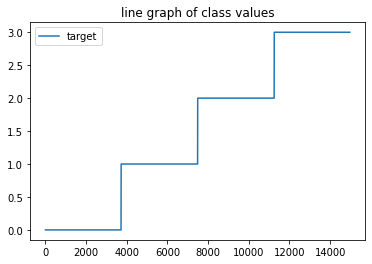

In [ ]:
dataset[target] = dataset[target].map(mapping_dict)
dataset[target].plot(legend = "class values", title = "line graph of class values");

In [ ]:
# defining width and height of image
img_width, img_height = 25, 25

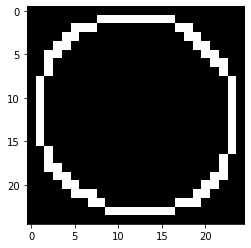

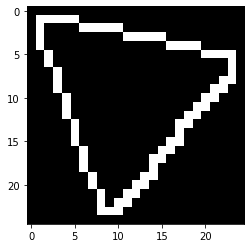

In [ ]:
# visualizing the first entry of the dataset
img = dataset.iloc[0, :-1].to_numpy().reshape(img_width, img_height)
plt.imshow(img, cmap = 'binary_r'), plt.show();

# visualizing the last entry of the dataset
img = dataset.iloc[-1, :-1].to_numpy().reshape(img_width, img_height)
plt.imshow(img, cmap = 'binary_r'), plt.show();

# Applying Gaussian Naive Bayes

## Importing required libraries

In [ ]:
import random # for generating random numbers
import seaborn as sns # for plotting confusion_matrix
from sklearn.metrics import confusion_matrix # for obtaining confusion_matrix
from sklearn.naive_bayes import GaussianNB # using probabilistic machine learning model
from sklearn.metrics import accuracy_score # for computing accuracy
from sklearn.model_selection import train_test_split # for splitting training and testing dataset

# for projecting data into a lower dimensional space to improve accuracy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

## Splitting the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size = 0.25, random_state = 42)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.996259684744857

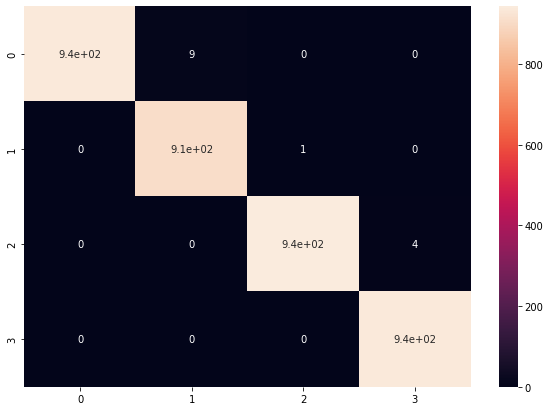

In [ ]:
cf_mat = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cf_mat, index =  range(4), columns = range(4))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True);

## Using LDA to project data into a 3D Space to improve accuracy

In [ ]:
lda = LDA(n_components = 3)
lda.fit(X_train, y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

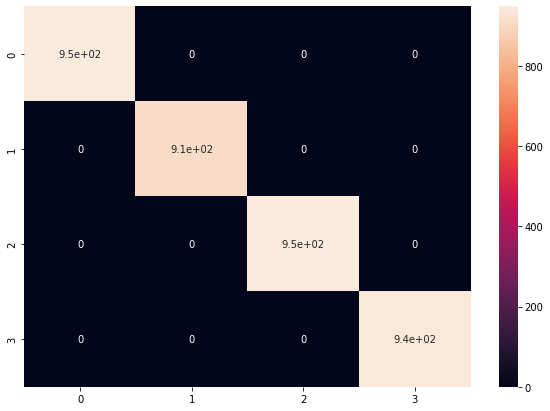

In [ ]:
cf_mat = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cf_mat, index =  range(4), columns = range(4))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True);

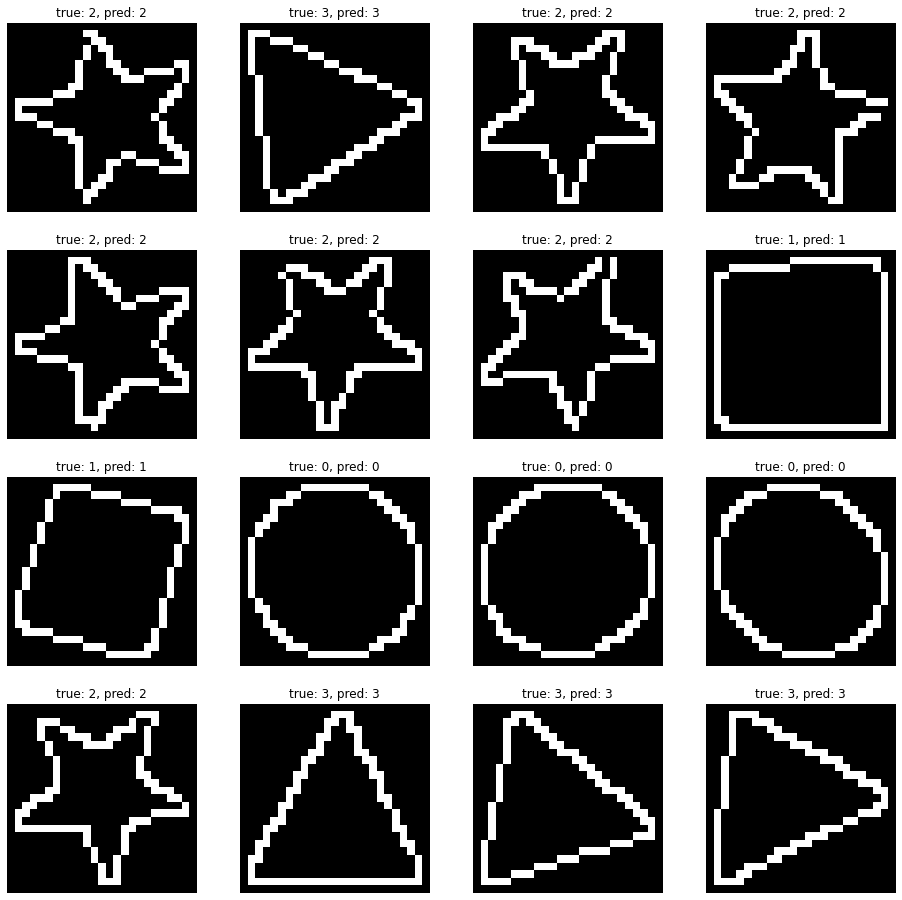

In [ ]:
rows = 4
cols = 4

plt.figure(figsize = (cols * 4, rows * 4))
rdm_indices = np.random.randint(low = 0, high = dataset.shape[0], size = rows * cols)
y_pred = clf.predict(lda.transform(dataset.iloc[rdm_indices, :-1]))

for i in range(rows * cols):
  img = dataset.iloc[rdm_indices[i], :-1].to_numpy().reshape(img_width, img_height)
  plt.subplot(rows, cols, i + 1), plt.axis("off")
  plt.title(f"true: {dataset.iloc[rdm_indices[i], -1]}, pred: {y_pred[i]}")
  plt.imshow(img, cmap = "binary_r")
  
plt.show();

In [ ]:
# !pip install cPickle
import _pickle as cPickle
# save the classifier
with open('/content/drive/MyDrive/sem 8/CV/processed_shapes/gauss-without-lda.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)

In [ ]:
# load it again
with open('/content/drive/MyDrive/sem 8/CV/processed_shapes/gauss-without-lda.pkl', 'rb') as fid:
    clf_loaded = cPickle.load(fid)